# 1. Import libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Load Ulcer only dataset 
Dataset of dfu_features with ulcer_present = 1 is loaded

In [9]:
df = pd.read_csv("0_dfu_features.csv")
df_ulcers = df[df['ulcer_present'] == 1].copy()

# 3. Relevant Clinical features is selected and standardized

In [10]:
# SELECT RELEVANT CLINICAL FEATURES
features = ['color_variance', 'erythema_index']
X = df_ulcers[features]

# STANDARDIZE FEATURES
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Find best_K using silhouette_score and elbow method

🚀 Programmatically Determined Optimal K: 6


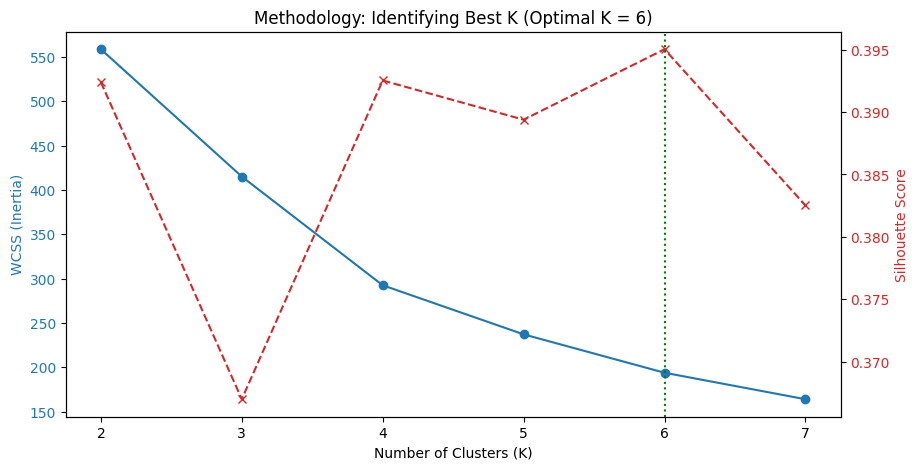

In [11]:
# We test K values for typical medical risk ranges
k_range = range(2, 8)
sil_scores = []
wcss = [] # For the Elbow Method plot

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))
    wcss.append(kmeans.inertia_)

# Identify Best K based on maximum Silhouette Score
best_K = k_range[np.argmax(sil_scores)]
print(f"🚀 Programmatically Determined Optimal K: {best_K}")

# VISUALIZATION: ELBOW & SILHOUETTE ANALYSIS
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot WCSS (Elbow)
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('WCSS (Inertia)', color='tab:blue')
ax1.plot(k_range, wcss, marker='o', color='tab:blue', label='Elbow Method')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for Silhouette Score
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(k_range, sil_scores, marker='x', linestyle='--', color='tab:red', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title(f'Methodology: Identifying Best K (Optimal K = {best_K})')
plt.axvline(x=best_K, color='green', linestyle=':', label='Optimal Split')
plt.show()

# 5. APPLY FINAL CLUSTERING WITH best_K

In [12]:
kmeans_final = KMeans(n_clusters=best_K, init='k-means++', random_state=42, n_init=10)
df_ulcers['Severity_Cluster'] = kmeans_final.fit_predict(X_scaled)

# 6. Visualize Risk Stratification

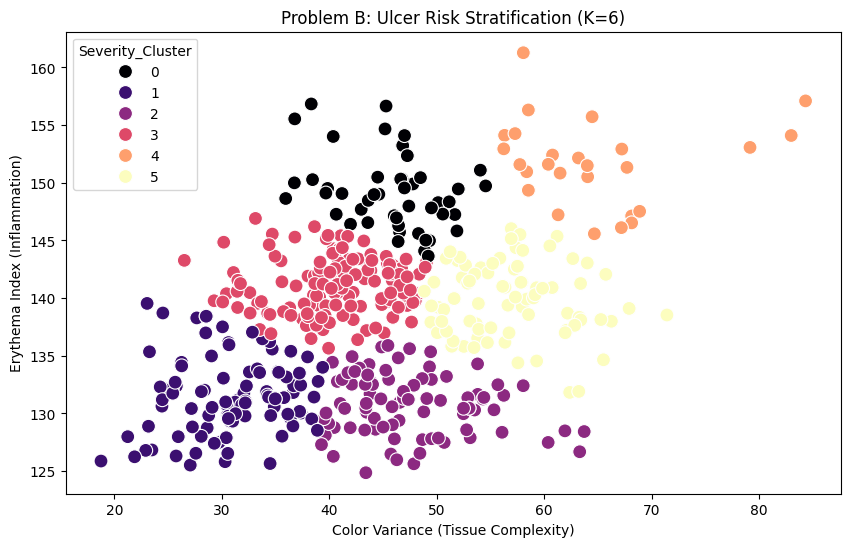

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ulcers, x='color_variance', y='erythema_index', 
                hue='Severity_Cluster', palette='magma', s=100)
plt.title(f"Problem B: Ulcer Risk Stratification (K={best_K})")
plt.xlabel("Color Variance (Tissue Complexity)")
plt.ylabel("Erythema Index (Inflammation)")
plt.show()

# 7. Export Clinical Profiles to csv

In [14]:
df_ulcers.to_csv("3_Clustering_Severity_Results.csv", index=False)
print("\n--- Clinical Profiles of Discovered Clusters ---")
display(df_ulcers.groupby('Severity_Cluster')[features].mean())


--- Clinical Profiles of Discovered Clusters ---


,color_variance,erythema_index
Severity_Cluster,,
0,45.793149,149.177443
1,30.885335,131.315120
2,47.478381,130.690613
3,40.624805,141.066614
4,64.083037,151.524163
5,56.904256,139.862476
